## Valeurs de dn

In [16]:
def table_d_n_nd(N):
    """ Renvoie une table de taille N+1 x N+1 avec en coordonnée (n,nd) le nombre de DAG à n noeuds (racine exclue) avec nd noeuds dans la dernière couche"""
    table = [[0 for _ in range(N+1)] for _ in range(N+1)]
    for n in range(N+1):
        table[n][n] = 1
    for n in range(2,N+1):
        for nd in range(1,n):
            somme = 0
            for l in range(1,n-nd+1):
                somme += table[n-nd][l]*(2^l - 1)^nd
            table[n][nd] = somme
    return table

In [17]:
n = 200

tab_d = table_d_n_nd(n)
dn = [sum(tab_d[i]) for i in range(len(tab_d))]

On ne compte pas la racine comme un noeud car $d_2 = 2$

In [21]:
dn[:5]

[1, 1, 2, 6, 26]

## Programmation dynamique pour calcul des $dM_n$ en fonction de la dernière couche

In [1]:
def nombre_dM_dernier_layer(n,nd):
    """ Renvoie le nombre de DAG dM à n noeuds (racine exclue) avec nd noeuds dans la dernière couche"""
    if n == 0 :
        return 1 if nd==0 else 0
    if nd > n:
        return 0
    if nd == n:
        return 2^n
    
    rep = 0
    for l in range(1, n-nd +1):
        rep += 2^(l*nd)*nombre_dM_dernier_layer(n-nd,l)
        
    return rep


def table_dM_n_nd(N):
    """ Renvoie une table de taille N+1 x N+1 avec en coordonnée (n,nd) le nombre de DAG à n noeuds (racine exclue) avec nd noeuds dans la dernière couche"""
    table = [[0 for _ in range(N+1)] for _ in range(N+1)]
    for n in range(N+1):
        table[n][n] = 1
    for n in range(2,N+1):
        for nd in range(1,n):
            somme = 0
            for l in range(1,n-nd+1):
                somme += table[n-nd][l]*2^(l*nd)
            table[n][nd] = somme
    return table

In [3]:
n = 200

tab_dM = table_dM_n_nd(n)
dMn = [sum(tab_dM[i]) for i in range(len(tab_dM))]

On ne compte pas la racine comme un noeud car $dM_2 = 3$

In [20]:
dMn[:5]

[1, 1, 3, 13, 73]

## Estimation asymptotique

$\frac{dM_n}{n . 2^{\frac{n^2}{4}}}$

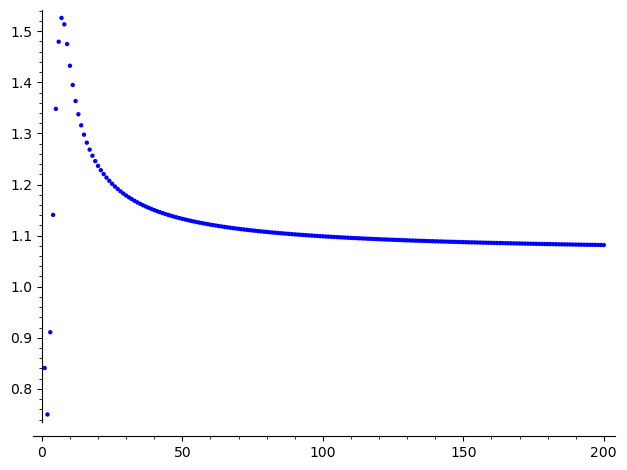

In [12]:
f = [(i,dMn[i]/(2**(i^2/4)*i)) for i in range(1, len(dMn))]
points(f)

## Comparaison avec dn

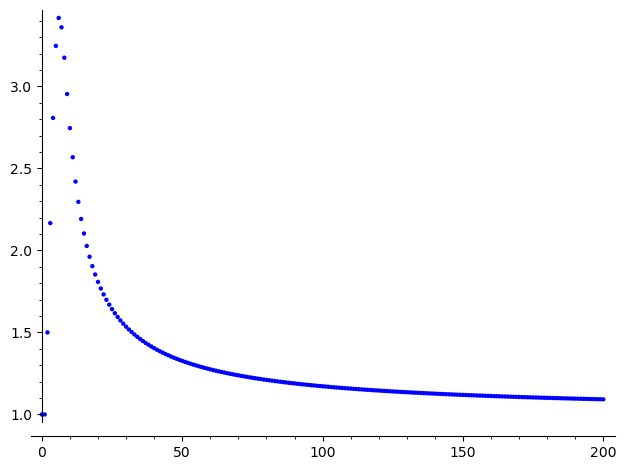

In [18]:
g = [(i, dMn[i]/dn[i]) for i in range(min(len(dn), len(dMn)))]
points(g)

## Estimation de dn

$\frac{d_n}{n . 2^{\frac{n^2}{4}}}$

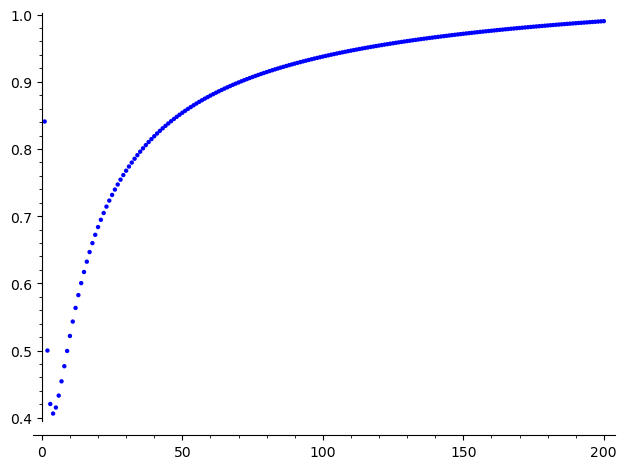

In [19]:
f = [(i,dn[i]/(2**(i^2/4)*i)) for i in range(1, len(dMn))]
points(f)

## Profils les plus représentés

In [31]:
def dM_profil(profil):
    """ Renvoie le nombre de DAG de Mehdi de profil 'profil' """
    produit = (2^1 - 1)^profil[0]
    for k in range(1, len(profil)):
        produit = produit*(2^profil[k-1])^profil[k]
    return produit


def repartition_dM_profil(n):
    rep = {}
    for e in Compositions(n):
        profil = list(e)
        rep[tuple(profil)] = dM_profil(profil)
    return rep


def profils_dominants_dM(n, epsilon = 0.1):
    """ Renvoie la liste des profils qui ont un nb de DAG supérieur à (1-epsilon)*nb_dags_profil_max """
    repartition = repartition_dM_profil(n)
    dMn = 0
    nb_dags_profil_max = 0
    for k in repartition:
        dMn += repartition[k]
        if repartition[k] > nb_dags_profil_max:
            nb_dags_profil_max = repartition[k]
    
    profils_dominants = []
    dags_dominants = 0
    for k in repartition:
        if repartition[k] >= (1-epsilon)*nb_dags_profil_max:
            dags_dominants += repartition[k]
            profils_dominants.append((k, repartition[k]))
    return (profils_dominants, float(dags_dominants/dMn))

#### Cas $n = 2k$

In [34]:
profils_dominants_dM(10)

([((1, 5, 4), 33554432),
  ((2, 5, 3), 33554432),
  ((3, 5, 2), 33554432),
  ((4, 5, 1), 33554432),
  ((5, 5), 33554432)],
 0.3490636377678964)

In [36]:
profils_dominants_dM(14)

([((1, 7, 6), 562949953421312),
  ((2, 7, 5), 562949953421312),
  ((3, 7, 4), 562949953421312),
  ((4, 7, 3), 562949953421312),
  ((5, 7, 2), 562949953421312),
  ((6, 7, 1), 562949953421312),
  ((7, 7), 562949953421312)],
 0.3799725787074967)

In [37]:
profils_dominants_dM(16)

([((1, 8, 7), 18446744073709551616),
  ((2, 8, 6), 18446744073709551616),
  ((3, 8, 5), 18446744073709551616),
  ((4, 8, 4), 18446744073709551616),
  ((5, 8, 3), 18446744073709551616),
  ((6, 8, 2), 18446744073709551616),
  ((7, 8, 1), 18446744073709551616),
  ((8, 8), 18446744073709551616)],
 0.39004727331507627)

In [33]:
profils_dominants_dM(20)

([((1, 10, 9), 1267650600228229401496703205376),
  ((2, 10, 8), 1267650600228229401496703205376),
  ((3, 10, 7), 1267650600228229401496703205376),
  ((4, 10, 6), 1267650600228229401496703205376),
  ((5, 10, 5), 1267650600228229401496703205376),
  ((6, 10, 4), 1267650600228229401496703205376),
  ((7, 10, 3), 1267650600228229401496703205376),
  ((8, 10, 2), 1267650600228229401496703205376),
  ((9, 10, 1), 1267650600228229401496703205376),
  ((10, 10), 1267650600228229401496703205376)],
 0.40438122665040493)

In [39]:
profils_dominants_dM(20, epsilon = 0.5)

([((1, 9, 9, 1), 633825300114114700748351602688),
  ((1, 9, 10), 633825300114114700748351602688),
  ((1, 10, 9), 1267650600228229401496703205376),
  ((1, 11, 8), 633825300114114700748351602688),
  ((2, 9, 9), 633825300114114700748351602688),
  ((2, 10, 8), 1267650600228229401496703205376),
  ((2, 11, 7), 633825300114114700748351602688),
  ((3, 9, 8), 633825300114114700748351602688),
  ((3, 10, 7), 1267650600228229401496703205376),
  ((3, 11, 6), 633825300114114700748351602688),
  ((4, 9, 7), 633825300114114700748351602688),
  ((4, 10, 6), 1267650600228229401496703205376),
  ((4, 11, 5), 633825300114114700748351602688),
  ((5, 9, 6), 633825300114114700748351602688),
  ((5, 10, 5), 1267650600228229401496703205376),
  ((5, 11, 4), 633825300114114700748351602688),
  ((6, 9, 5), 633825300114114700748351602688),
  ((6, 10, 4), 1267650600228229401496703205376),
  ((6, 11, 3), 633825300114114700748351602688),
  ((7, 9, 4), 633825300114114700748351602688),
  ((7, 10, 3), 12676506002282294014967

In [47]:
2^(100)

1267650600228229401496703205376

#### Cas $n = 2k + 1$

In [41]:
profils_dominants_dM(11)

([((1, 5, 5), 1073741824),
  ((1, 6, 4), 1073741824),
  ((2, 5, 4), 1073741824),
  ((2, 6, 3), 1073741824),
  ((3, 5, 3), 1073741824),
  ((3, 6, 2), 1073741824),
  ((4, 5, 2), 1073741824),
  ((4, 6, 1), 1073741824),
  ((5, 5, 1), 1073741824),
  ((5, 6), 1073741824),
  ((6, 5), 1073741824)],
 0.60291140118096)

In [40]:
profils_dominants_dM(15)

([((1, 7, 7), 72057594037927936),
  ((1, 8, 6), 72057594037927936),
  ((2, 7, 6), 72057594037927936),
  ((2, 8, 5), 72057594037927936),
  ((3, 7, 5), 72057594037927936),
  ((3, 8, 4), 72057594037927936),
  ((4, 7, 4), 72057594037927936),
  ((4, 8, 3), 72057594037927936),
  ((5, 7, 3), 72057594037927936),
  ((5, 8, 2), 72057594037927936),
  ((6, 7, 2), 72057594037927936),
  ((6, 8, 1), 72057594037927936),
  ((7, 7, 1), 72057594037927936),
  ((7, 8), 72057594037927936),
  ((8, 7), 72057594037927936)],
 0.6480486548345514)

In [42]:
profils_dominants_dM(19)

([((1, 9, 9), 1237940039285380274899124224),
  ((1, 10, 8), 1237940039285380274899124224),
  ((2, 9, 8), 1237940039285380274899124224),
  ((2, 10, 7), 1237940039285380274899124224),
  ((3, 9, 7), 1237940039285380274899124224),
  ((3, 10, 6), 1237940039285380274899124224),
  ((4, 9, 6), 1237940039285380274899124224),
  ((4, 10, 5), 1237940039285380274899124224),
  ((5, 9, 5), 1237940039285380274899124224),
  ((5, 10, 4), 1237940039285380274899124224),
  ((6, 9, 4), 1237940039285380274899124224),
  ((6, 10, 3), 1237940039285380274899124224),
  ((7, 9, 3), 1237940039285380274899124224),
  ((7, 10, 2), 1237940039285380274899124224),
  ((8, 9, 2), 1237940039285380274899124224),
  ((8, 10, 1), 1237940039285380274899124224),
  ((9, 9, 1), 1237940039285380274899124224),
  ((9, 10), 1237940039285380274899124224),
  ((10, 9), 1237940039285380274899124224)],
 0.6749653955294967)

In [50]:
profils_dominants_dM(19, epsilon = 0.8)

([((1, 7, 9, 2), 309485009821345068724781056),
  ((1, 8, 8, 2), 309485009821345068724781056),
  ((1, 8, 9, 1), 618970019642690137449562112),
  ((1, 8, 10), 309485009821345068724781056),
  ((1, 9, 8, 1), 618970019642690137449562112),
  ((1, 9, 9), 1237940039285380274899124224),
  ((1, 10, 8), 1237940039285380274899124224),
  ((1, 11, 7), 309485009821345068724781056),
  ((2, 8, 8, 1), 309485009821345068724781056),
  ((2, 8, 9), 309485009821345068724781056),
  ((2, 9, 7, 1), 309485009821345068724781056),
  ((2, 9, 8), 1237940039285380274899124224),
  ((2, 10, 7), 1237940039285380274899124224),
  ((2, 11, 6), 309485009821345068724781056),
  ((3, 8, 8), 309485009821345068724781056),
  ((3, 9, 7), 1237940039285380274899124224),
  ((3, 10, 6), 1237940039285380274899124224),
  ((3, 11, 5), 309485009821345068724781056),
  ((4, 8, 7), 309485009821345068724781056),
  ((4, 9, 6), 1237940039285380274899124224),
  ((4, 10, 5), 1237940039285380274899124224),
  ((4, 11, 4), 309485009821345068724781056